## Regime Transiente 1D Difusão de Calor

Equação 2D:

$$\frac{\partial^2 T}{\partial^2 x}  + \frac{\partial^2 T}{\partial^2 y} = \alpha^2 \frac{\partial T}{\partial t}  \tag{1}$$

Onde difusividade térmica é:

$$ \alpha^2 = \frac{k}{\rho c} $$ em $ \frac{m^2}{s} $

Simplicando para o caso 1D:

$$\frac{\partial^2 T}{\partial^2 x}  = \alpha^2 \frac{\partial T}{\partial t}  \tag{2}$$

Em um grid regular, utilizando discretização em diferenças finitas usando diferenças centradas para o espaço:

O indice de tempo é **n** e indice do eixo x é **i**.  

$$
\frac{\partial^2 T^n_i}{\partial^2 x}  = \frac{T_{i+1}^n-2T_{i}^n+T_{i-1}^n}{\Delta x^2}  
\tag{3}
$$


e diferença progressiva para o tempo nos indices de tempo **n** e **n+1** ("futuro"):

$$ \frac{\partial T_{i}^n}{\partial t} = \frac{T_i^{n+1}-T_i^n}{\Delta t} \tag{4} $$






Combinando as equações (2), (3) e (4) chegamos em um esquema de "marcha" em (5). Onde os valores **n+1** ("futuro") podem ser calculados a partir dos valores em **n**: 

$$ \frac{T_i^{n+1}-T_i^n}{\Delta t} \alpha^2  = \frac{T_{i+1}^n-2T_{i}^n+T_{i-1}^n}{\Delta x^2} $$


$$ T_i^{n+1} = \frac{1}{\alpha^2 } \frac{\Delta t}{\Delta x^2}\left(T_{i+1}^n-2T_{i}^n+T_{i-1}^n\right)  + T_i^n $$

$$ T_i^{n+1} = \lambda \left(T_{i+1}^n-2T_{i}^n+T_{i-1}^n\right)  + T_i^n \tag{5}$$

onde:

$$ \lambda = \frac{1}{\alpha^2 } \frac{\Delta t}{\Delta x^2} \tag{6} $$ 

Para garantir estabilidade numérica do esquema (Von Neumann)  $\lambda \leq 2$

_________________________________________________________

_________________________________________________________

_________________________________________________________

# 1.
Reproduza o exemplo mostrado onde uma barra e discretizada com 6 pontos. Rodando tempo suﬁciente para
encontrar a solucao de equilıbrio e compare qualitativamente com os resultados mostrados no exemplo;

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

Lambda satisfaz condição de estabilidade < 2?  True
Wall time: 50 ms


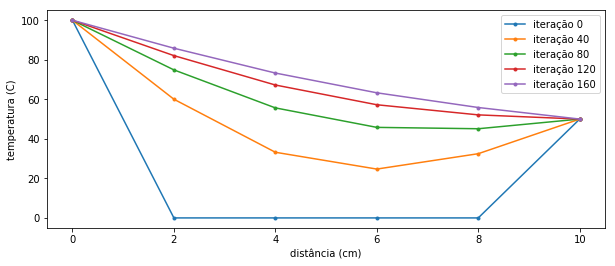

In [2]:
%%time
import numpy as np

k = 0.835 #K alumínio = 1/alfa^2
dx = 2 # discretização espaço 
dt = 0.1 # discretiuzação tempo 
lmbda = (k*dt)/dx 
print('Lambda satisfaz condição de estabilidade < 2? ',  lmbda < 2.)

tbarra = np.zeros((2, 6)) # temperatura da barra em tn e tn+1 : 2 arrays de 6 posições
# condições iniciais no tempo 0
tbarra[0, 0] = 100. # tn 
tbarra[0, 5] = 50. # tn

# tamanho da figura dimensões em polegadas
plt.figure(figsize=(10,4))

for n in range(200): # 200 iterações : escolha arbitrário
    # a cada 20 iterações plota a temperatura da barra
    if n%40==0:
        plt.plot(np.arange(6)*dx, tbarra[0, :], '.-',label='iteração '+str(n))
        plt.ylabel('temperatura (C)')
        plt.xlabel('distância (cm)')
    # calcula equação 5 em todas as posições da barra exceto contornos (i : 0 e 5)
    for i in range(1, 5):         
        # tn+1 = f(tn)
        tbarra[1, i] = lmbda*(tbarra[0, i+1] -2*tbarra[0, i]+tbarra[0, i-1]) + tbarra[0, i]     
    # tn+1 = tn  atualiza os array de tempo agora n+1 é n
    tbarra[0, 1:5] = tbarra[1, 1:5]

# plota legenda
plt.legend()

_________________________________________________________

_________________________________________________________

_________________________________________________________

_________________________________________________________

# 2. 
Aumente o n´umero de pontos na dire¸c˜ao espacial x (diminuindo o espa¸camento Δx), mantendo o mesmo
problema f´ısico, tanto as dimens˜oes quanto as propriedades f´ısicas. OBS: Fique atento ao crit´erio de
estabilidade num´erica λ ≤ 1/2, escolhendo um intervalo de tempo Δt apropriado. UTILIZE O
MESMO λ ADOTADO NO ITEM ANTERIOR;

Aumentando o número de pontos  no eixo **x** igual á N.

Novo delta x será:
$$ (N-1)*\Delta x = 10 cm$$
$$ \Delta x = \frac{10 cm}{(N-1)} $$

Qual o $\Delta t$ adequado?  
A equação (6) responde abaixo:  

$$ \frac{1}{\alpha^2 } \frac{\Delta t}{\Delta x^2} \leq 2 $$ 


$$ \Delta t \leq 2 \frac{1}{\alpha^2 } \Delta x^2  $$ 
$$ \Delta t \leq 2 *0.835 \Delta x^2  $$ 
$$ \Delta t \leq 2 *0.835 *0.1^2  $$ 
$$ \Delta t \leq 0.0167 $$ 

Mas devemos usar o mesmo $\lambda$ do item 1. logo:  

$$ \frac{1}{\alpha^2 } \frac{\Delta t}{\Delta x^2} = 0.04175 $$
$$ k \frac{\Delta t}{\Delta x^2} = 0.04175 $$
$$ \Delta t = \frac{\Delta x^2  0.04175}{k}$$

Para N = 101  
$$ \Delta t = 0.0005 $$

A equação (5) pode ser escrita como uma convolução:


$$ T_i^{n+1} = \lambda \left(T_{i+1}^n-2T_{i}^n+T_{i-1}^n\right)  + T_i^n $$

Sendo o operador de diferenciação na direção x substituido pelo kernel : `[1, -2, 1]`

$$ T_i^{n+1} = \lambda \left(T_i^n \circledast \left[1, -2, 1\right] \right)  + T_i^n $$

  
Nota .: A convolução deve ser somente para região de "sobreposição" (overlap) completo. (numpy 'valid' mode)

In [105]:
import numpy as np
from scipy.signal import fftconvolve

def rodarSimulacao(N, duracao, save=10, lmbda=0.04175):
    """
    * N : numero de pontos discretização em x
    * duracao : em segundos da simulacao da difusao
    * lmbda : lambda predefido para garantir estabilidade numérica
    igual à 0.04175 baseado no item 1
    * save : numero de 'snapshots' para salvar  
    
    O numero de iteracoes é calculado baseado na duracao
    """
    #N = 100 # numero de pontos
    k = 0.835 #K alumínio = 1/alfa^2
    dx = 10./(N-1) # 10 cm / N-1 pontos discretização espaço 
    dt = (dx**2*lmbda)/k # discretização tempo garantindo lambda igual à 0.04175
    lmbda = (k*dt)/dx 
    # "paineis" com temperatura da barra em tn e tn+1
    tbarra = np.zeros((2, N)) # temperatura da barra em tn e tn+1 : 2 arrays de N posições    
    # condições de contorno iniciais no tempo 0 e inf
    tbarra[:,  0] = 100. # tn e tn+1 
    tbarra[:, -1] = 50. # tn e tn+1     
    niter = int(duracao/dt) # numero de iteracoes necessarias para essa duracao
    nsave = int(niter/save) # step de iteracoes para salvar 'snapshot'
    snapshots = np.zeros((save+1, N)) # 'filme' das iteracoes
    isnap = 0 # indice para salvar 'snapshots' das iteracoes    
    for n in range(niter): # marcha
        tbarra[1, 1:-1] = lmbda*(np.convolve(np.array([1, -2, 1]), tbarra[0, :], mode='valid')) + tbarra[0, 1:-1] 
        tbarra[0, 1:-1] = tbarra[1, 1:-1]
        if n%nsave==0:
            snapshots[isnap, :] = tbarra[1, :]
            isnap += 1 # p/ próximo 'frame' do 'filme'
    
    # imprime um resumo de alguns parâmetros
    print('Dt: {:.3g} numero de Iteracoes: {:5d} '.format(dt, niter))
    
    # salva o último
    snapshots[-1, :] = tbarra[1, :]
    # retorna o 'filme' de snapshots, e o intervalo em x
    
    return snapshots, dx

Dt: 0.0005 numero de Iteracoes: 599999 
Wall time: 3.91 s


C:\Users\alferreira\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


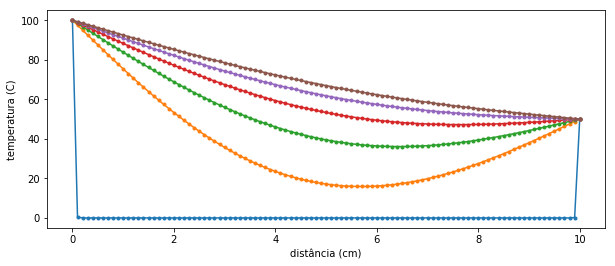

In [107]:
%%time
# solucao para 300 segundos de difusao, 101 pontos e 5 snapshots
snapshots, dx = rodarSimulacao(101, 300., save=5)
# tamanho da figura dimensões em polegadas
plt.figure(figsize=(10,4))
# a cada algumas iterações plota a temperatura da barra
plt.plot(np.arange(101)*dx, snapshots.T, '.-')
plt.ylabel('temperatura (C)')
plt.xlabel('distância (cm)')

# plota legenda
plt.legend()

_________________________________________________________

_________________________________________________________

_________________________________________________________

_________________________________________________________

# 3.
Compare os erros das solucoes numericas de equilıbrio (nos 2 casos anteriores) em relacao a solu¸cao analıtica  
(uma reta que passa pelos pontos de temperatura 100◦e 50◦C nos extremos), em especial no caso de utilizacao  
de λ = 1/6 (que tende a minimizar os erros);  

A solução analítica pode ser escrita como uma reta:

$$ f(x) = 100 -5x $$ 

Lembrando que a barra tem 10 cm e logo que $\Delta x = \frac{10}{N-1} $.  
Escrevendo em função dos **N** pontos de discretização e $ \Delta x $


$$ f(i\Delta x) = 100 -5(i\Delta x) $$
$$ f(i) = 100 -5(i\Delta x) $$

Onde $i$ represente um indíce de posição na barra.

### Verificou-se que as simulações com diferentes discretizações x não coincidem em tempo.

Por exemplo, 10 segundos de difusão no modelo de 6 pontos difere totalmente de  
dos mesmos 10 segundos no modelo de 100 pontos com mesmos parâmetros.


Possível explicação:

O erro da solução (aproximação de diferenças finitas) é proporcional ao número de iterações, erro segunda ordem no tempo.

1. Rodamos três configuraçoes de parâmetros até o equilíbro  
    1.1 Para 6 pontos  (20 segundos)  
    1.2 Para 100 pontos  (300 segundos)  
    1.3 Para 100 pontos com $\lambda = 1/6$ (300 segundos)  
2. Extraímos a configuração final de temperaturas    
3. Comparamos pelo o erro absoluto com a solução analítica    

In [108]:
%%time

# Primeira simulação 6 pontos
N=6
snapshots, dx = rodarSimulacao(N, 20., save=10)
tfinal6pontos = snapshots[-1, :] # configuração final de temperaturas
# Solução analítica
erro_analitica1 = 100-np.array([5*dx*i for i in range(N)])
erro_analitica1 = np.abs(erro_analitica1 - tfinal6pontos)
x1 = np.arange(N)*dx # eixo x

# Segunda simulação 101 pontos
N=101
snapshots, dx = rodarSimulacao(N, 300., save=10)
tfinal100pontos = snapshots[-1, :] # configuração final de temperaturas
# Solução analítica
erro_analitica2 = 100-np.array([5*dx*i for i in range(N)])
erro_analitica2 = np.abs(erro_analitica2 - tfinal100pontos)
x2 = np.arange(N)*dx # eixo x

# Terceira simulação 101 pontos com lambda = 1/6.
N=101
snapshots, dx = rodarSimulacao(N, 300., save=10, lmbda=1./6)
tfinal100pontosL = snapshots[-1, :] # configuração final de temperaturas
# Solução analítica
erro_analitica3 = 100-np.array([5*dx*i for i in range(N)])
erro_analitica3 = np.abs(erro_analitica3 - tfinal100pontosL)

Dt: 0.2 numero de Iteracoes:   100 
Dt: 0.0005 numero de Iteracoes: 599999 
Dt: 0.002 numero de Iteracoes: 150299 
Wall time: 4.78 s


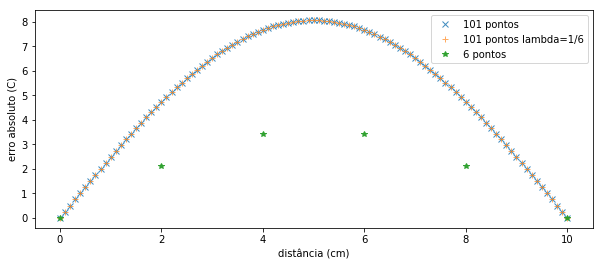

In [156]:
# tamanho da figura dimensões em polegadas
plt.figure(figsize=(10,4))
# a cada algumas iterações plota a temperatura da barra
plt.plot(x2, erro_analitica2, 'x', alpha=40, label='101 pontos')
plt.plot(x2, erro_analitica3, '+', alpha=90, label='101 pontos lambda=1/6')
plt.plot(x1, erro_analitica1, '*', alpha=10, label='6 pontos')
plt.ylabel('erro absoluto (C)')
plt.xlabel('distância (cm)')
# plota legenda
plt.legend()

### Discussão dos Resultados

A simulação que precisou do menor número de iterações para atingir a situação (ou tempo) de "equilíbrio" 
foi a que teve menor erro.   
Não foi possível perceber a diferença do $ \lambda $ com esse teste.

### Simula com 11 pontos 80 segundos

1. com $\lambda$  definido no item 1.  
2. com $\lambda = 1/6$  

Utiliza o erro absoluto com a solução analítica para avaliar os resultados

In [166]:
# solucao para 30 segundos de difusao, 11 pontos 
snapshots, dx = rodarSimulacao(11, 80., save=5)
p0 = snapshots[-1, :]
snapshots, dx = rodarSimulacao(11, 80., save=5, lmbda=1./6)
p1 = snapshots[-1, :]
# Solução analítica
erro_0 = 100-np.array([5*dx*i for i in range(11)])
erro_0 = np.abs(erro_0 - p0)
# Solução analítica
erro_1 = 100-np.array([5*dx*i for i in range(11)])
erro_1 = np.abs(erro_1 - p1)

Dt: 0.05 numero de Iteracoes:  1600 
Dt: 0.2 numero de Iteracoes:   400 


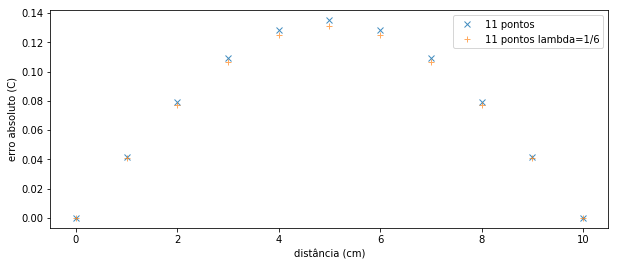

In [167]:
# tamanho da figura dimensões em polegadas
plt.figure(figsize=(10,4))
# a cada algumas iterações plota a temperatura da barra
plt.plot(erro_0, 'x', alpha=40, label='11 pontos')
plt.plot(erro_1, '+', alpha=90, label='11 pontos lambda=1/6')
plt.ylabel('erro absoluto (C)')
plt.xlabel('distância (cm)')
# plota legenda
plt.legend()

### Conclusão:

**Para o mesma duração de simulação de difusão de calor.  
Com $\lambda=1/6 $ com menos iterações foi obtida uma solução de menor erro.**